#📌 Extracción

In [3]:
#Importando librerias
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [27]:
#Extraccion de datos
url = 'https://raw.githubusercontent.com/migueloropeza/Challenge-Telecom-X-Parte1/refs/heads/main/TelecomX_Data.json'
result = requests.get(url)
data = result.json()

In [28]:
#Convercion de datos a un DataFrame
datos =  pd.json_normalize(data)
datos

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [29]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

#🔧 Transformación

In [30]:
#Reemplazmos los vacios de la columna Total por 0
datos['account.Charges.Total'] = datos['account.Charges.Total'].replace(' ', 0)

In [31]:
#Transformacion de la columna Total a float
datos['account.Charges.Total'] = datos['account.Charges.Total'].astype(float)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [26]:
#Transformaicon de las cadenas a minusculas
columnas_str=['Churn','customer.gender','customer.Partner','customer.Dependents','phone.PhoneService','phone.MultipleLines','internet.InternetService',
            'internet.OnlineBackup','internet.DeviceProtection','internet.TechSupport','internet.StreamingTV','internet.StreamingMovies','account.Contract',
            'account.PaperlessBilling','account.PaymentMethod']
for i in columnas_str:
  datos[i]=datos[i].str.lower()

datos.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,no,female,0,yes,yes,9,yes,no,dsl,...,yes,no,yes,yes,no,one year,yes,mailed check,65.6,593.30
1,0003-MKNFE,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40
2,0004-TLHLJ,yes,male,0,no,no,4,yes,no,fiber optic,...,no,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85
3,0011-IGKFF,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85
4,0013-EXCHZ,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40


In [34]:
#Trasnformacion de columnas binarias yes y no en 1 y 0 respectivamente
columnas_bin=['Churn','customer.Partner','customer.Dependents','phone.PhoneService','account.PaperlessBilling']
datos.loc[:,columnas_bin] = datos.loc[:,columnas_bin].replace({'Yes':1,'No':0, '':0})
datos.tail()

/tmp/ipython-input-2750483482.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos.loc[:,columnas_bin] = datos.loc[:,columnas_bin].replace({'Yes':1,'No':0, '':0})


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
7262,9987-LUTYD,0,Female,0,0,0,13,1,No,DSL,...,No,No,Yes,No,No,One year,0,Mailed check,55.15,742.90
7263,9992-RRAMN,1,Male,0,1,0,22,1,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.70
7264,9992-UJOEL,0,Male,0,0,0,2,1,No,DSL,...,Yes,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75
7265,9993-LHIEB,0,Male,0,1,1,67,1,No,DSL,...,No,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65
7266,9995-HOTOH,0,Male,0,1,1,63,0,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,0,Electronic check,59.00,3707.60


In [35]:
#Columnas binarias a tipo int
datos[columnas_bin] = datos[columnas_bin].astype(int)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   int64  
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   int64  
 5   customer.Dependents        7267 non-null   int64  
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   int64  
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [39]:
#Creacion de la columna ingresos por dia
datos['account.Charges.Daily'] = round(datos['account.Charges.Monthly']/30, 2)
datos.sample(10)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account.Charges.daily,account.Charges.Daily
1895,2680-XKKNJ,0,Female,0,0,0,8,1,No,DSL,...,Yes,No,No,One year,0,Bank transfer (automatic),58.20,469.25,1.94,1.94
666,0946-FKYTX,0,Male,0,0,0,52,0,No phone service,DSL,...,No,No,No,One year,0,Mailed check,30.10,1623.40,1.00,1.00
97,0156-FVPTA,1,Male,0,1,0,22,1,No,DSL,...,Yes,No,No,Month-to-month,1,Electronic check,54.20,1152.70,1.81,1.81
24,0031-PVLZI,1,Female,0,1,1,4,1,No,No,...,No internet service,No internet service,No internet service,Month-to-month,0,Mailed check,20.35,76.35,0.68,0.68
368,0530-HBKHZ,0,Female,1,1,0,1,0,No phone service,DSL,...,No,No,No,Month-to-month,1,Electronic check,24.80,24.80,0.83,0.83
1603,2273-QCKXA,0,Male,0,0,0,1,1,No,DSL,...,Yes,No,No,Month-to-month,0,Mailed check,49.05,49.05,1.64,1.64
752,1077-HUUJM,0,Female,0,0,1,7,1,No,Fiber optic,...,No,No,No,Month-to-month,1,Electronic check,71.05,472.65,2.37,2.37
4975,6806-YDEUL,0,Female,1,0,0,6,1,No,No,...,No internet service,No internet service,No internet service,Month-to-month,0,Bank transfer (automatic),19.50,106.80,0.65,0.65
3928,5370-IIVVL,0,Male,0,0,0,37,1,Yes,Fiber optic,...,Yes,Yes,Yes,One year,1,Credit card (automatic),104.50,3778.00,3.48,3.48
506,0722-SVSFK,0,Female,0,0,0,7,1,No,Fiber optic,...,Yes,Yes,Yes,Month-to-month,1,Electronic check,100.40,715.00,3.35,3.35


In [41]:
datos.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account.Charges.Daily
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80


#📊 Carga y análisis

In [43]:
#Analisis descriptivo de los datos
datos.describe()

,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,account.Charges.Daily
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2277.182035,2.157292
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,2268.648587,1.004407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,396.200000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1389.200000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,3778.525000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


In [44]:
#Analisis derscriptivo de columnas categoricas
datos.describe(include='all')

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account.Charges.Daily
count,7267,7267.000000,7267,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267,7267,...,7267,7267,7267,7267,7267,7267.000000,7267,7267.000000,7267.000000,7267.000000
unique,7267,NaN,2,NaN,NaN,NaN,NaN,NaN,3,3,...,3,3,3,3,3,NaN,4,NaN,NaN,NaN
top,9995-HOTOH,NaN,Male,NaN,NaN,NaN,NaN,NaN,No,Fiber optic,...,No,No,No,No,Month-to-month,NaN,Electronic check,NaN,NaN,NaN
freq,1,NaN,3675,NaN,NaN,NaN,NaN,NaN,3495,3198,...,3195,3582,2896,2870,4005,NaN,2445,NaN,NaN,NaN
mean,NaN,0.257190,NaN,0.162653,0.484106,0.300124,32.346498,0.902711,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.593230,NaN,64.720098,2277.182035,2.157292
std,NaN,0.437115,NaN,0.369074,0.499782,0.458343,24.571773,0.296371,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.491265,NaN,30.129572,2268.648587,1.004407
min,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,18.250000,0.000000,0.610000
25%,NaN,0.000000,NaN,0.000000,0.000000,0.000000,9.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,35.425000,396.200000,1.180000
50%,NaN,0.000000,NaN,0.000000,0.000000,0.000000,29.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,70.300000,1389.200000,2.340000
75%,NaN,1.000000,NaN,0.000000,1.000000,1.000000,55.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,89.875000,3778.525000,2.995000


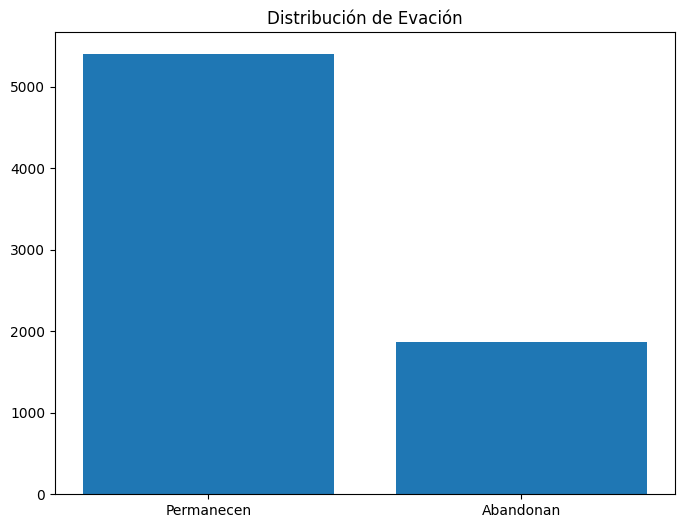

In [60]:
#Distribucion de evasión
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(['Permanecen', 'Abandonan'], datos['Churn'].value_counts())
ax.set_title('Distribución de Evación')
plt.show()

Text(0.5, 1.0, 'Sexo')

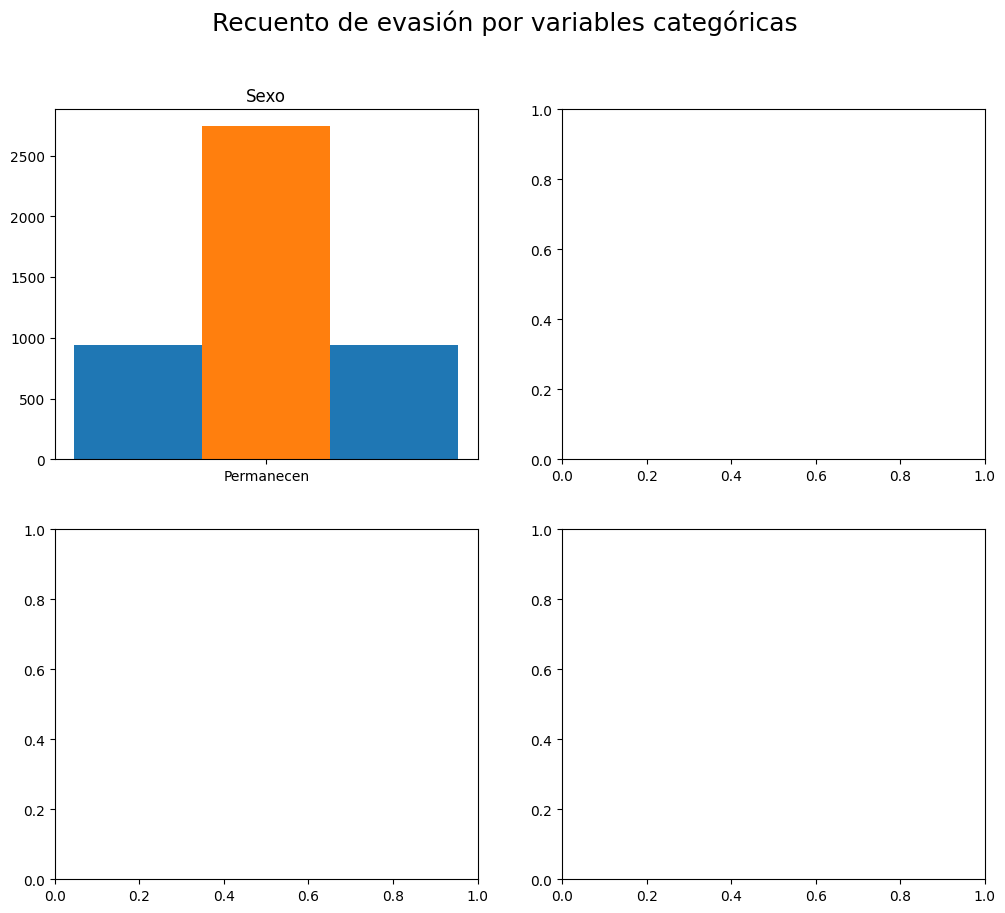

In [84]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Recuento de evasión por variables categóricas', fontsize = 18)

ax[0,0].bar(['Permanecen', 'Abandonan'], datos[datos['Churn']==1]['customer.gender'].value_counts(), width=0.3)
ax[0,0].bar(['Permanecen', 'Abandonan'], datos[datos['Churn']==0]['customer.gender'].value_counts(), width=0.1)
ax[0,0].set_title('Sexo')

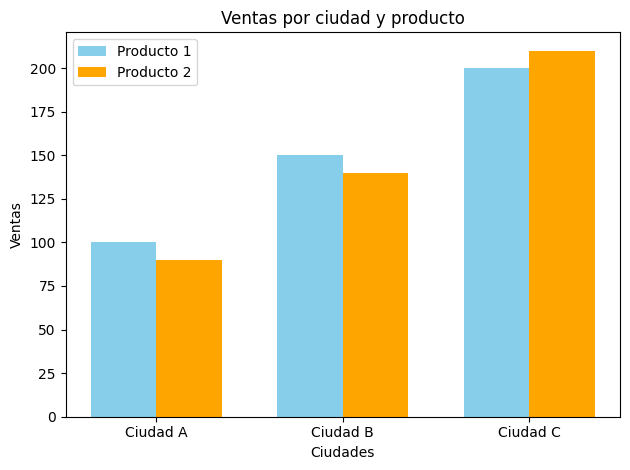

#📄Informe final